## Nairobi Data Analysis

In [1]:
# importing the needed libraries
# type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading Nairobi Data

In [3]:
# read the nairobi Kenya csv file
nairobi = pd.read_csv('Kenya(Nairobi).csv')

# display the first five observations
nairobi.head(10)

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2156118,Nairobi,pm25,6.4,µg/m³,2024-01-28T16:00:00+00:00,2024-01-28T19:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
1,2156118,Nairobi,pm25,9.1,µg/m³,2024-01-28T17:00:00+00:00,2024-01-28T20:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
2,2156118,Nairobi,pm25,8.8,µg/m³,2024-01-28T18:00:00+00:00,2024-01-28T21:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
3,2156118,Nairobi,pm25,9.3,µg/m³,2024-01-28T19:00:00+00:00,2024-01-28T22:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
4,2156118,Nairobi,pm25,11.0,µg/m³,2024-01-28T20:00:00+00:00,2024-01-28T23:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
5,2156118,Nairobi,pm25,11.0,µg/m³,2024-02-04T08:00:00+00:00,2024-02-04T11:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
6,2156118,Nairobi,pm25,9.4,µg/m³,2024-02-04T09:00:00+00:00,2024-02-04T12:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
7,2156118,Nairobi,pm25,8.5,µg/m³,2024-02-04T10:00:00+00:00,2024-02-04T13:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
8,2156118,Nairobi,pm25,6.1,µg/m³,2024-02-04T11:00:00+00:00,2024-02-04T14:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
9,2156118,Nairobi,pm25,5.6,µg/m³,2024-02-04T12:00:00+00:00,2024-02-04T15:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity


##  Describing the data

In [4]:
# showing the shape of the dataset
print(f'The Tuen Mun dataset is made up of{nairobi.shape}')

# showing the information about the dataset.
nairobi.info()

The Tuen Mun dataset is made up of(3360, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    3360 non-null   int64  
 1   location_name  3360 non-null   object 
 2   parameter      3360 non-null   object 
 3   value          3360 non-null   float64
 4   unit           3360 non-null   object 
 5   datetimeUtc    3360 non-null   object 
 6   datetimeLocal  3360 non-null   object 
 7   timezone       3360 non-null   object 
 8   latitude       3360 non-null   float64
 9   longitude      3360 non-null   float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     3360 non-null   object 
 14  provider       3360 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 393.9+ KB


## Data cleaning and wrangling

This process will involve the following steps:
* Dropping unneccesary columns.
* Handling missing values.
* Removing duplicates.
* Concerting datetimeLocal and datetimeUtc to a pandas datetime
* Setting datetimeLocal and datetimeUtc as index
* Creating a pivot table for the with the pollutants as the column and the datetimeUtc as index

In [9]:
# dropping unnecessary columns
"""
This function removes all the unnecessary columns
"""
def clean_data(nairobi):
    # Drop column: 'latitude'
    nairobi = nairobi.drop(columns=['latitude'])
    nairobi = nairobi.drop(columns=['longitude'])
    nairobi = nairobi.drop(columns=['country_iso'])
    nairobi = nairobi.drop(columns=['isMobile'])
    nairobi = nairobi.drop(columns=['isMonitor'])
    nairobi = nairobi.drop(columns=['owner_name'])
    nairobi = nairobi.drop(columns=['provider'])
    nairobi = nairobi.drop(columns=['location_id'])
    return nairobi

# checking for duplicate values
dup = nairobi.duplicated().sum()
print('The number of duplicates values is: ', dup)

# invoving the function
nairobi_clean = clean_data(nairobi.copy())

# checking for missing values
missing = nairobi_clean.isnull().sum()
print(f'The number of missing values are: {missing}')

# checking for duplicate values.
duplicate = nairobi_clean.duplicated().sum()
print(f'The number of duplicate values are: {duplicate}')

# converting datetimeLocal and datetimeUtc to pandas datetime
nairobi_clean['datetimeUtc'] = pd.to_datetime(nairobi_clean['datetimeUtc'], utc=True)
nairobi_clean['datetimeLocal'] = pd.to_datetime(nairobi_clean['datetimeLocal'])

# setting both datetimeLocal and Utc as index
nairobi_clean.set_index(nairobi_clean['datetimeUtc'], inplace=True)
nairobi_clean.set_index(nairobi_clean['datetimeLocal'])

# displaying the first 10 observations
nairobi_clean.head(10)

The number of duplicates values is:  0
The number of missing values are: location_name    0
parameter        0
value            0
unit             0
datetimeUtc      0
datetimeLocal    0
timezone         0
dtype: int64
The number of duplicate values are: 0


,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone
datetimeUtc,,,,,,,
2024-01-28 16:00:00+00:00,Nairobi,pm25,6.4,µg/m³,2024-01-28 16:00:00+00:00,2024-01-28 19:00:00+03:00,Africa/Nairobi
2024-01-28 17:00:00+00:00,Nairobi,pm25,9.1,µg/m³,2024-01-28 17:00:00+00:00,2024-01-28 20:00:00+03:00,Africa/Nairobi
2024-01-28 18:00:00+00:00,Nairobi,pm25,8.8,µg/m³,2024-01-28 18:00:00+00:00,2024-01-28 21:00:00+03:00,Africa/Nairobi
2024-01-28 19:00:00+00:00,Nairobi,pm25,9.3,µg/m³,2024-01-28 19:00:00+00:00,2024-01-28 22:00:00+03:00,Africa/Nairobi
2024-01-28 20:00:00+00:00,Nairobi,pm25,11.0,µg/m³,2024-01-28 20:00:00+00:00,2024-01-28 23:00:00+03:00,Africa/Nairobi
2024-02-04 08:00:00+00:00,Nairobi,pm25,11.0,µg/m³,2024-02-04 08:00:00+00:00,2024-02-04 11:00:00+03:00,Africa/Nairobi
2024-02-04 09:00:00+00:00,Nairobi,pm25,9.4,µg/m³,2024-02-04 09:00:00+00:00,2024-02-04 12:00:00+03:00,Africa/Nairobi
2024-02-04 10:00:00+00:00,Nairobi,pm25,8.5,µg/m³,2024-02-04 10:00:00+00:00,2024-02-04 13:00:00+03:00,Africa/Nairobi
2024-02-04 11:00:00+00:00,Nairobi,pm25,6.1,µg/m³,2024-02-04 11:00:00+00:00,2024-02-04 14:00:00+03:00,Africa/Nairobi


## Changing the dataset to a pandas dataframe.
###  Converting the Utc and Local time to Pandas datetime

In [5]:
# convert local date time Utc and Local to datetimeIndex format
nairobi['datetimeLocal'] = pd.to_datetime(nairobi['datetimeLocal'])
nairobi['datetimeUtc'] = pd.to_datetime(nairobi['datetimeUtc'], utc=True)

# convert to a dataframe
nairobi_df = pd.DataFrame(nairobi)
nairobi_df.head()

,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone
0,Nairobi,pm25,6.4,µg/m³,2024-01-28 16:00:00+00:00,2024-01-28 19:00:00+03:00,Africa/Nairobi
1,Nairobi,pm25,9.1,µg/m³,2024-01-28 17:00:00+00:00,2024-01-28 20:00:00+03:00,Africa/Nairobi
2,Nairobi,pm25,8.8,µg/m³,2024-01-28 18:00:00+00:00,2024-01-28 21:00:00+03:00,Africa/Nairobi
3,Nairobi,pm25,9.3,µg/m³,2024-01-28 19:00:00+00:00,2024-01-28 22:00:00+03:00,Africa/Nairobi
4,Nairobi,pm25,11.0,µg/m³,2024-01-28 20:00:00+00:00,2024-01-28 23:00:00+03:00,Africa/Nairobi


## Descriptive Statistics

In [6]:
# creating a pivot table
nairobi_table = nairobi_df.pivot_table(
    index='datetimeLocal',
    values='value',
    columns=['parameter', 'unit']
    )

# descriptive statistics of the pm25 pollutant
descriptive_stats = nairobi_table['pm25'].describe()
print('The descriptive statistics of pm25 pollutant in nairobi is:')
print(descriptive_stats)

nairobi_table.head()

The descriptive statistics of pm25 pollutant in nairobi is:
unit         µg/m³
count  3360.000000
mean     50.866548
std      66.971691
min       0.000000
25%       7.600000
50%      12.000000
75%      85.000000
max     210.000000


parameter,pm25
unit,µg/m³
datetimeLocal,
2024-01-28 19:00:00+03:00,6.4
2024-01-28 20:00:00+03:00,9.1
2024-01-28 21:00:00+03:00,8.8
2024-01-28 22:00:00+03:00,9.3
2024-01-28 23:00:00+03:00,11.0


## Exploratory analysis
To show the trend of pm25 over time

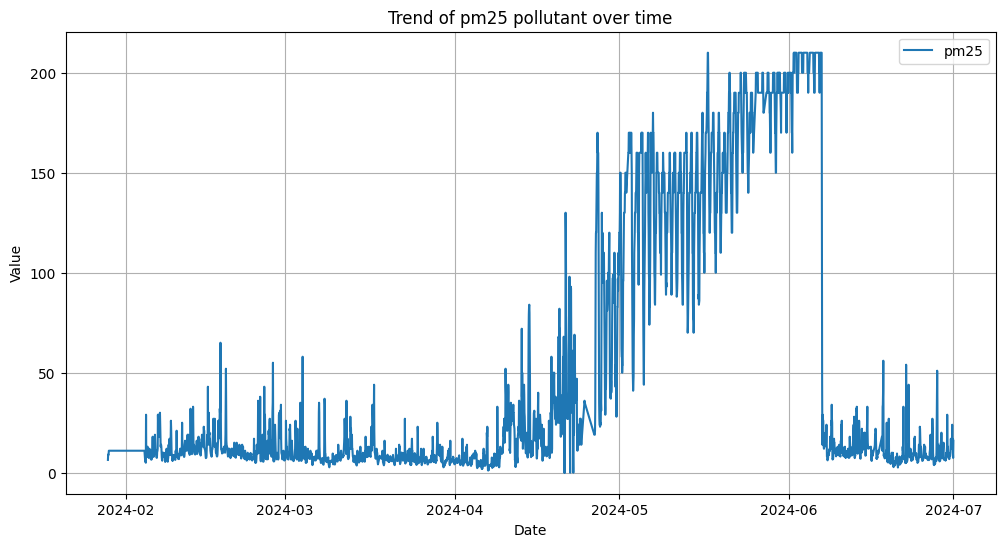

In [7]:
# plotting the time series
plt.figure(figsize=(12,6))
plt.plot(nairobi['datetimeUtc'], nairobi['value'], label = 'pm25')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend of pm25 pollutant over time')
plt.legend()
plt.grid(True)
plt.show()

## Resampling the data
To get a clearer view of the trends

In [8]:
# resampling the datetimeLocal to per day using mean as aggredation
nairobi_resampled = nairobi_table.resample('D').mean()

# filling the missing value with the median
nairobi_resampled.fillna(nairobi_resampled.median(), inplace=True)
nairobi_resampled.head()

parameter,pm25
unit,µg/m³
datetimeLocal,
2024-01-28 00:00:00+03:00,8.92
2024-01-29 00:00:00+03:00,13.58
2024-01-30 00:00:00+03:00,13.58
2024-01-31 00:00:00+03:00,13.58
2024-02-01 00:00:00+03:00,13.58


## Visualization of the Nairobi data resampled to per day

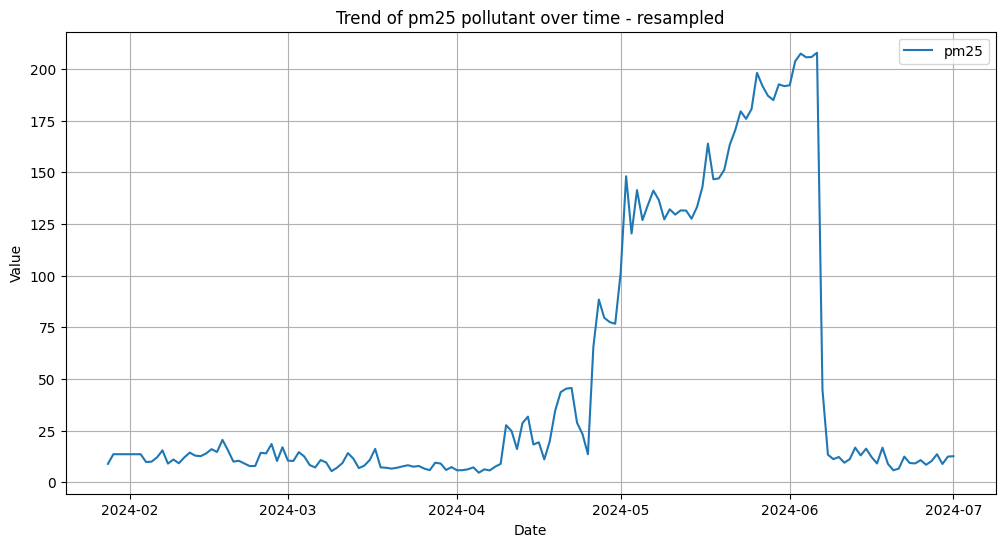

In [9]:
# plotting the time series
plt.figure(figsize=(12,6))
plt.plot(nairobi_resampled['pm25'], label = 'pm25')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend of pm25 pollutant over time - resampled')
plt.legend()
plt.grid(True)
plt.show()

## Comparing the level of PM25 in each month

In [10]:
# resampling to monthly format using mean as aggredation
nairobi_resampled_monthly = nairobi_table.resample('ME').mean()
# remove the last month(7)
nairobi_resampled_monthly =nairobi_resampled_monthly.iloc[0:6]
nairobi_resampled_monthly.head()

parameter,pm25
unit,µg/m³
datetimeLocal,
2024-01-31 00:00:00+03:00,8.920000
2024-02-29 00:00:00+03:00,12.673366
2024-03-31 00:00:00+03:00,8.918414
2024-04-30 00:00:00+03:00,28.811836
2024-05-31 00:00:00+03:00,151.010324


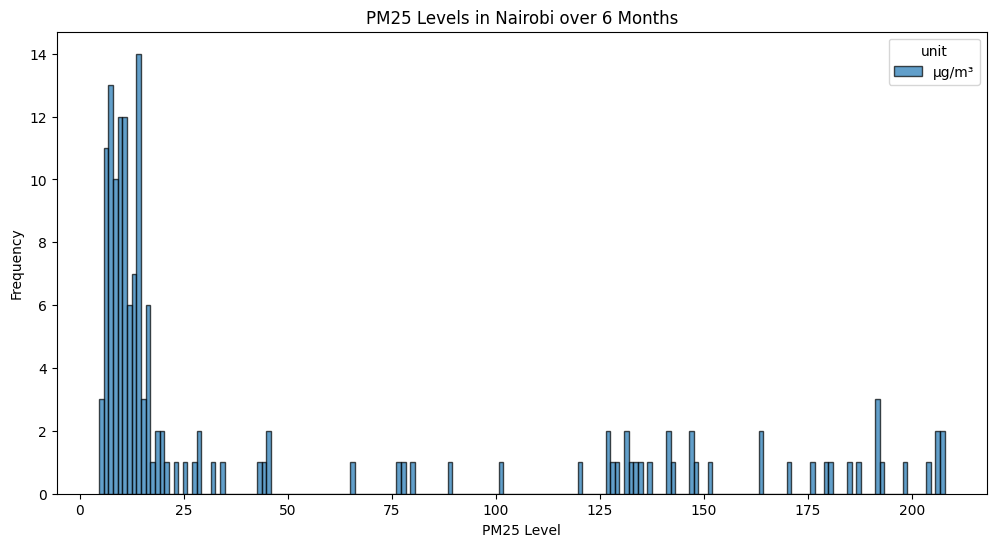

In [15]:
# creating a histogram for nairobi_resampled_monthly
nairobi_resampled['pm25'].plot.hist(figsize=(12, 6), bins=182, alpha=0.7, edgecolor='black')

# Set title and labels
plt.title('PM25 Levels in Nairobi over 6 Months')
plt.xlabel('PM25 Level')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Generating aoutocorrelation function plot
To detect seasonality

<Figure size 1200x600 with 0 Axes>

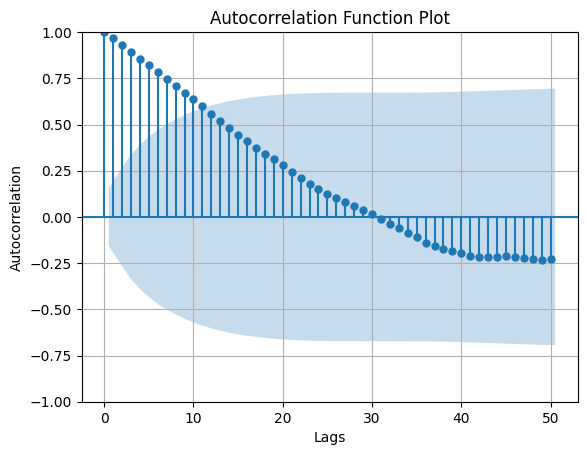

In [12]:
# plotting the auto correlation function 
plt.figure(figsize=(12,6))
plot_acf(nairobi_resampled['pm25'], lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function Plot')
plt.grid(True)
plt.show()

In [13]:
# create a breakpoint dictionary
breakpoints = {
    'pm25': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300)], 
}
# declare a function calculate_aqi
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            return (bp[3] - bp[2]) / (bp[1] - bp[0]) * (concentration - bp[0]) + bp[2]
    return None
# Sample DataFrame with pollutant concentrations
data = {
    'datetimeUtc': pd.date_range(start='2024-01-01', periods=4369, freq='h'),
    'pm25': np.random.uniform(0, 250, 4369),
}
nairobi_aqi = pd.DataFrame(data)

# Calculate AQI for pm25
nairobi_aqi['AQI_pm25'] = nairobi_aqi['pm25'].apply(lambda x: calculate_aqi(x, breakpoints['pm25']))

# Calculate overall AQI as the maximum of individual AQIs
nairobi_aqi['AQI'] = nairobi_aqi[['AQI_pm25']].max(axis=1)

# Calculate overall AQI as the maximum of individual AQIs
nairobi_aqi.head()


,datetimeUtc,pm25,AQI_pm25,AQI
0,2024-01-01 00:00:00,232.530925,282.291907,282.291907
1,2024-01-01 01:00:00,145.069556,197.247716,197.247716
2,2024-01-01 02:00:00,63.710691,155.239451,155.239451
3,2024-01-01 03:00:00,33.736027,96.500657,96.500657
4,2024-01-01 04:00:00,134.850806,191.971438,191.971438
